In [1]:
import quickdraw

2022-06-14 11:50:05.850690: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-14 11:50:05.850710: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(x_train, y_train), (x_test, y_test) = quickdraw.load_data()

In [3]:
x_train.shape, x_train.dtype

((60000, 28, 28), dtype('uint8'))

In [4]:
y_train.shape, y_train.dtype

((60000,), dtype('uint8'))

In [5]:
x_train  = x_train.reshape((-1, 28, 28, 1))/255.0
x_test  = x_test.reshape((-1, 28, 28, 1))/255.0

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
from tensorflow import keras
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [17]:
convnet = keras.models.Sequential()
convnet.add(keras.layers.InputLayer(input_shape=(28, 28, 1), name='Input'))
convnet.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='tanh'))
convnet.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='tanh'))
convnet.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
# divides by number of pools, grabs half by half at the moment
convnet.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='tanh'))
convnet.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='tanh'))
convnet.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
convnet.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='tanh'))
convnet.add(keras.layers.Flatten())
convnet.add(keras.layers.Dense(units=64, activation='tanh'))
convnet.add(keras.layers.Dense(units=10, activation='softmax'))
            
convnet.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_30 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_32 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                 

In [18]:
convnet.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.RMSprop(),
    metrics=keras.metrics.CategoricalAccuracy()
)
history = convnet.fit(
    x=x_train,
    y=y_train,
    epochs=6,
    batch_size=100,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/6
600/600 [==============================] - 65s 106ms/step - loss: 0.8871 - categorical_accuracy: 0.7142 - val_loss: 0.5819 - val_categorical_accuracy: 0.8149
Epoch 2/6
600/600 [==============================] - 64s 106ms/step - loss: 0.5389 - categorical_accuracy: 0.8293 - val_loss: 0.5004 - val_categorical_accuracy: 0.8378
Epoch 3/6
600/600 [==============================] - 65s 109ms/step - loss: 0.4380 - categorical_accuracy: 0.8604 - val_loss: 0.4609 - val_categorical_accuracy: 0.8526
Epoch 4/6
600/600 [==============================] - 64s 107ms/step - loss: 0.3774 - categorical_accuracy: 0.8812 - val_loss: 0.4748 - val_categorical_accuracy: 0.8488
Epoch 5/6
600/600 [==============================] - 65s 108ms/step - loss: 0.3327 - categorical_accuracy: 0.8935 - val_loss: 0.4129 - val_categorical_accuracy: 0.8675
Epoch 6/6
600/600 [==============================] - 65s 109ms/step - loss: 0.2936 - categorical_accuracy: 0.9047 - val_loss: 0.3984 - val_categorical_accuracy:

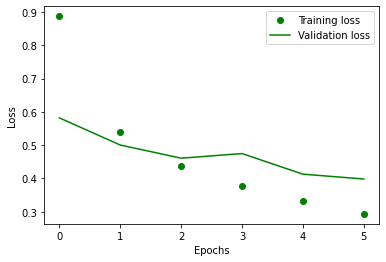

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'go', label='Training loss')
plt.plot(history.history['val_loss'], 'g-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

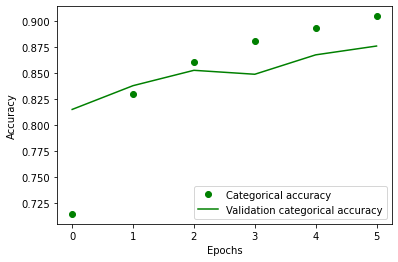

In [25]:
plt.plot(history.history['categorical_accuracy'], 'go', label='Categorical accuracy')
plt.plot(history.history['val_categorical_accuracy'], 'g-', label='Validation categorical accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
import numpy as np

yhat_test = convnet.predict(x_test)
label_test = np.argmax(yhat_test, axis=1)
label_test

313/313 [==============================] - 3s 9ms/step


array([8, 1, 9, ..., 0, 6, 5])

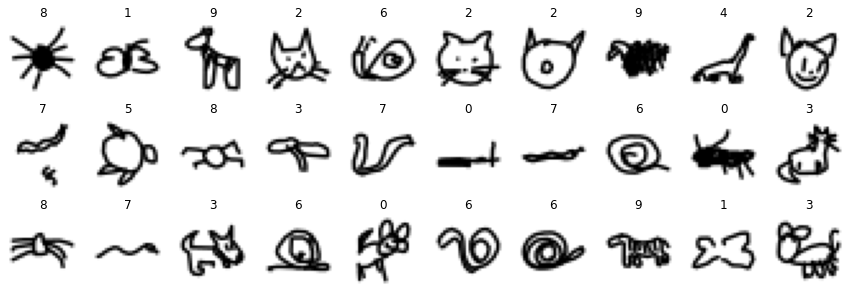

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for img in range(30):
    plt.subplot(3, 10, img+1)
    plt.imshow(x_test[img].reshape((28, 28)), cmap=plt.cm.binary)
    plt.axis(False)
    plt.title(str(label_test[img]))
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix

conmat = confusion_matrix(np.argmax(y_test, axis=1), label_test)
conmat

array([[817,  11,  12,  40,  13,  11,   3,   9,  43,  23],
       [ 12, 964,   5,  12,   1,   6,   3,   0,  12,   3],
       [ 21,   3, 785, 118,   4,  16,   9,   1,  14,  10],
       [ 59,   4,  89, 763,  21,  43,   7,   7,   6,  35],
       [  3,   0,   7,  12, 936,   1,   2,  17,   1,  12],
       [ 10,   3,  13,  38,   4, 842,   7,   7,  39,  26],
       [  3,   2,   4,   9,   3,   6, 904,  15,   1,   4],
       [  7,   2,   2,  18,  15,  15,  17, 938,   6,   1],
       [ 25,   8,  10,  12,   3,  27,   4,   9, 865,   4],
       [ 22,   4,   4,  46,   8,  19,   7,   4,   6, 946]])

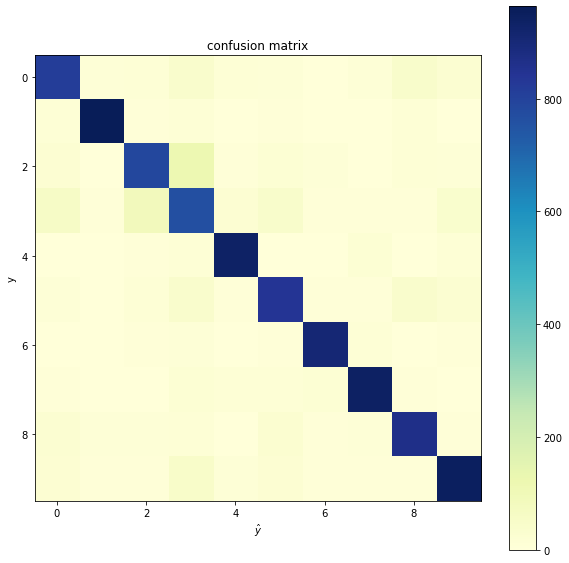

In [32]:
plt.subplots(figsize=(10, 10))
plt.imshow(conmat, cmap=plt.cm.YlGnBu, vmin=0.0)
plt.xlabel('$\hat{y}$')
plt.ylabel('y')
plt.colorbar()
plt.title('confusion matrix')
plt.show()

In [33]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score
print(f'Acc: {accuracy_score(np.argmax(y_test, axis=1), label_test):.3}')
print(f'bAcc: {balanced_accuracy_score(np.argmax(y_test, axis=1), label_test):.3}')

Acc: 0.876
bAcc: 0.876


In [34]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), label_test, digits=4))

              precision    recall  f1-score   support

           0     0.8345    0.8320    0.8332       982
           1     0.9630    0.9470    0.9549      1018
           2     0.8432    0.8002    0.8211       981
           3     0.7144    0.7379    0.7260      1034
           4     0.9286    0.9445    0.9365       991
           5     0.8540    0.8514    0.8527       989
           6     0.9387    0.9506    0.9446       951
           7     0.9315    0.9187    0.9250      1021
           8     0.8711    0.8945    0.8827       967
           9     0.8891    0.8874    0.8883      1066

    accuracy                         0.8760     10000
   macro avg     0.8768    0.8764    0.8765     10000
weighted avg     0.8764    0.8760    0.8761     10000

